Copyright 2017 Bruno Maximilian Voss

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [1]:
#imports and helper functions

import matplotlib.pyplot as plt
import math

def distance(x,y,xi=0,yi=0):
    return ((x-xi)**2+(y-yi)**2)**0.5

def convert_phi_to_rad(phi):
    rad=(phi/360)*math.pi*2
    return rad

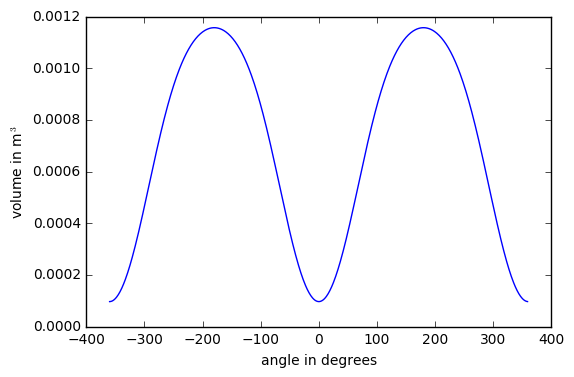

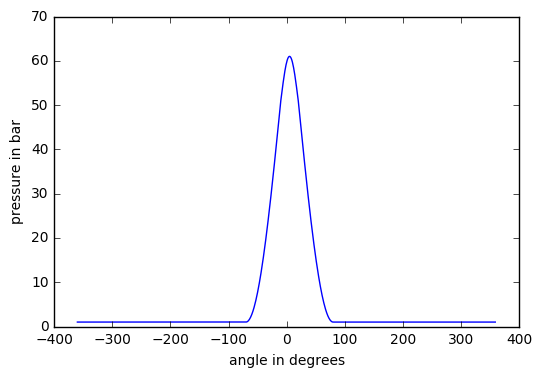

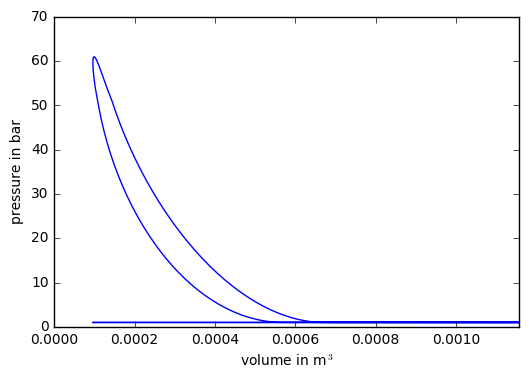

In [2]:
#basic plots

def Volume(phi,r,lambda_s,A):
    #the formula to calucate the volume of a cylinder
    h  = r * ( (1-math.cos(phi)) + 1/lambda_s * ( 1- (1-lambda_s**2 * math.sin(phi)**2)**0.5 ) ) 
    V=h*A
    
    return V

#the rest is generator functions for the values that you should have measured

def dummy_pressure(x):
    #dummy function to simulate pressure in a cylinder
    #for demonstration purposes only!
    
    p_0=1
    v=1
    width=30
    offset=5
    build=60
    
    lb=-(build+width/2-offset)
    ls=-(width/2-offset)
    rs= (width/2+offset)
    rb= (build+width/2+offset)
    if x < lb:
        v=1
        
    if lb <= x < ls:
        v=(math.sin(math.pi*2/2 + math.pi*1/2*(abs(-ls+x)/build))+1)*50 +1
        
    if  ls <= x <= rs:
        v=(math.sin((((width/2-offset)+x)/width)*math.pi))*10+50 +1
        
    if rb  >= x > rs:
        v=(math.sin(math.pi*2/2 + math.pi*1/2*(abs(-rs+x)/build))+1)*50 +1
        
    if x > rb:
        v=1
    p=v
    
    return p

def generate_volumes(rads,r,lambda_s,A,epsilon=12):
    V_hs=[]   
    for rad in rads:
        V_h=Volume(rad,r,lambda_s,A)
        V_hs.append(V_h)
    
    
    Vs=[]
    V_hmax=max(V_hs)
    for V_h in V_hs:
        #epsilon=12
        V_c=V_hmax/(epsilon-1)
        V=V_h+V_c
        Vs.append(V)
    return Vs

#generate my angles and radians
phis=[phi for phi in range(-360,360)]

rads=[]
for phi in phis:
    rads.append(convert_phi_to_rad(phi))

#cylinder and engine geometry
r_bore=0.075 # in m
A=math.pi*r_bore**2

r=0.03 # in m
l=0.06 # in m
lambda_s=r/l

Vs=generate_volumes(rads,r,lambda_s,A)

#generate the pressure values
ps=[] 
for phi in phis:
    dp=dummy_pressure(phi)
    ps.append(dp)
    
#plot cylinder volume over angle
plt.plot(phis,Vs)
plt.xlabel("angle in degrees")
plt.ylabel("volume in m${^3}$")
plt.show()
plt.clf()

#plot pressure over angle
plt.plot(phis,ps)
plt.xlabel("angle in degrees")
plt.ylabel("pressure in bar")
plt.show()
plt.clf()

#plot pressure over volume
plt.xlim([0,max(Vs)])
plt.plot(Vs,ps)
plt.xlabel("volume in m${^3}$")
plt.ylabel("pressure in bar")
plt.show()
plt.clf()


In [3]:
#the dummy data

m=8
Us=[[10]*m,[20]*m,[30]*m,[40]*m,[50]*m]

#this basically defines the coordinate grid where matplotlib will put
#the values of your contour plot
#grossly wrong numbers btw
P_mes=[[100,150,200,250,300,310,320,330],
      [100,150,200,250,300,330,390,430],
      [100,150,200,250,300,350,400,450],
      [100,150,200,240,280,320,360,420],
      [100,150,200,230,260,290,320,350],]

#some more values, because at some point the contour plot ends and there is no
#nice limit to it by default, maybe there is an option for that but I just
#draw another line

all_us=[10,20,30,40,50]

P_mes_max=[]
for l in P_mes:
    P_mes_max.append(l[-1])
    
#the actual values for the contour plot get generated here.
b_es=[]
for u in all_us:
    b_es.append([])
    for p in P_mes[2]:
        b_es[-1].append(distance(5*u,p,30*4,330))
        
#Note that Us, P_mes and b_es have to be of the same dimensions,
#e.g. they have to be matrices of a shape [5,8] or something else, 
#they just have the be the same size.

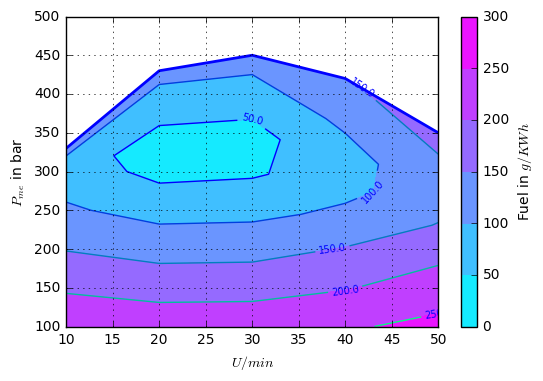

In [4]:
#the actual thing you're here for

def Kennfeld(Us,P_mes,b_es,simple_us,P_mes_max):
    
    X=Us
    Y=P_mes
    Z=b_es

    #the color "steps" your contour will have
    #you can also give this thing a list of limits 
    #where you want your lines to be drawn
    #levels=[50,100,200]
    levels=5
    
    #add the grid
    fig, ax = plt.subplots()
    ax.grid(True)
    
    #make it nice with some custom limits
    plt.ylim([100,500])
    
    #the colors are chosen by me, you can plug your own if you like
    #the complete list of colormaps is available here:
    
    #http://matplotlib.org/users/colormaps.html
    
    #this draws the top limit line
    plt.plot(simple_us,P_mes_max,linewidth=2,color="blue")

    #this draws the filled contours
    CS=plt.contourf(X,Y,Z,levels,cmap="cool")
    #this draws the lines
    CS2=plt.contour(X,Y,Z,levels,cmap="winter")
    
    #this adds the numbers on the contour lines
    plt.clabel(CS2, fmt='%2.1f', colors='blue', fontsize=7)
    
    #this adds the legend to the right
    cbar = plt.colorbar(CS)
        
    plt.xlabel("$U/min$")
    plt.ylabel("$P_{me}$ in bar")
    cbar.ax.set_ylabel("Fuel in $g/KWh$")
    
    #save it as pdf to have a crisp vector graphic to plug into your latex report!
    
    plt.savefig("Motorkennfeld.png")
    plt.show()

        

Kennfeld(Us, P_mes,b_es, all_us,P_mes_max)